# Tutorial 1. The Measurement Control 

This tutorial covers basic usage of quantify focusing on running basic experiments using `MeasurementControl`. 
The `MeasurementControl` is the main `Instrument` in charge of running any experiment. It takes care of saving the data in a standardized format as well as live plotting of the data during the experiment. 
`quantify` makes a distinction between `soft`(ware) controlled measurements and `hard`(ware) controlled measurements. 

In a `soft` measurement `MeasurementControl` is in charge of the measurement loop and consecutively sets and gets datapoints. A `soft` measurement can be 1D, 2D or higher dimensional and also supports adaptive measurements in which the datapoints are determined during the measurement loop. 

In a `hard` measurement the hardware (such as an AWG or a central controller) is in charge of the measurement loop. In this case, the datapoints to be acquired are determined before the experiment starts and are precompiled into the hardware which is then armed and starts acquisition. In a `hard` measurement `MeasurementControl` does not take care of the measurement loop but still takes care of the data storage and live plotting of the experiment. 

In [1]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
from qcodes import ManualParameter, Parameter
%matplotlib inline

In [2]:
from quantify.measurement import MeasurementControl
import quantify.visualization.pyqt_plotmon as pqm





In [3]:
MC = MeasurementControl('MC')
plotmon = pqm.PlotMonitor_pyqt('plotmon')
MC.instr_plotmon(plotmon.name)

In [4]:
MC.instr_plotmon.get_instr().tuid()

'latest'

# Define a simple model 

In [5]:
from time import sleep

In [7]:

def CosFunc(t, amplitude, frequency, phase, offset):
    """A simple cosine function"""
    return amplitude * np.cos(2 * np.pi * frequency * t + phase) + offset

# Parameters are created to emulate a system being measured 
amp = ManualParameter('amp', initial_value=1, unit='V', label='Amplitude')
freq = ManualParameter('freq', initial_value=.5, unit='Hz', label='Frequency')
t = ManualParameter('t', initial_value=1, unit='s', label='Time')
phi = ManualParameter('phi', initial_value=0, unit='Rad', label='Phase')

acq_delay = ManualParameter('acq_delay', initial_value=.1, unit='s')

def cosine_model():
    sleep(acq_delay())
    return CosFunc(t(), amp(), freq(), phase=phi(), offset=0)

# We wrap our function in a Parameter to be able to give 
sig = Parameter(name='sig', label='Signal level', unit='V', get_cmd=cosine_model)

In [8]:
acq_delay(0.0)

# A 1D soft(ware) controlled loop

In [9]:
acq_delay(0.0) # we set this to a non-zero value to see the live plotting in action. 

In [10]:
MC.set_setpars(t)
MC.set_setpoints(np.linspace(0, 5, 50))
MC.set_getpars(sig)
dset = MC.run('Cosine test')


 100% completed 	elapsed time: 0.4s 	time left: 0.0s


In [11]:
dset.attrs

{'tuid': '20200504-192738-31c1a9', '2D-grid': False}

In [12]:

# By default the MC updates the datafile and live plot every 0.1 seconds to reduce overhead. 
# the total overhead is ~0.05s per update
MC.update_interval(0.01) # Setting it even to 0.01 makes a dramatic difference, try it out!

In [13]:
MC.set_setpars(t)
MC.set_setpoints(np.linspace(0, 50, 1000))
MC.set_getpars(sig)
dset = MC.run('Cosine test')



 100% completed 	elapsed time: 0.9s 	time left: 0.0s


# A 2D soft(ware) controlled loop

It is often desired to measure heatmaps (2D grids) of some parameter. 
This can be done by specifying two set parameters. 
The setpoints of the grid can be specified in two ways. 

## Method 1, a quick grid. 

In [18]:
MC.update_interval(.1)

In [19]:
times = np.linspace(0, 5, 500)
amps = np.linspace(-1, 1, 31)

MC.set_setpars([t, amp])
MC.set_setpoints(times)
MC.set_setpoints_2D(amps)
MC.set_getpars(sig)
dset = MC.run('2D Cosine test')


 100% completed 	elapsed time: 7.0s 	time left: 0.0s8s


In [27]:
dset.tuid

'20200504-180126-6d7fcc'

In [20]:
plotmon.tuid()
plotmon.update()

In [24]:
plotmon.tuid('latest')

In [29]:
plotmon.tuid()

'latest'

In [30]:
plotmon.tuid()

'latest'

In [32]:
MC.instr_plotmon()

''

In [33]:
plotmon.update()

Request timed out: ('callObj', 309, 0, b'\x80\x03}q\x00(X\x03\x00\x00\x00objq\x01cpyqtgraph.multiprocess.remoteproxy\nunpickleObjectProxy\nq\x02(MF\xacK\xd8Xc\x00\x00\x00<bound method AxisItem.setPen of <pyqtgraph.graphicsItems.AxisItem.AxisItem object at 0x12d9a5eb0>>q\x03)tq\x04Rq\x05X\x04\x00\x00\x00argsq\x06]q\x07K<K<K<\x87q\x08aX\x04\x00\x00\x00kwdsq\t}q\nX\n\x00\x00\x00returnTypeq\x0bX\x04\x00\x00\x00autoq\x0cu.')


  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/usr/local/C

Request timed out: ('callObj', 315, 0, b'\x80\x03}q\x00(X\x03\x00\x00\x00objq\x01cpyqtgraph.multiprocess.remoteproxy\nunpickleObjectProxy\nq\x02(MF\xacK\xdcX\x1f\x00\x00\x00<function mkPen at 0x10b658440>q\x03)tq\x04Rq\x05X\x04\x00\x00\x00argsq\x06]q\x07X\x07\x00\x00\x00#1f77b4q\x08aX\x04\x00\x00\x00kwdsq\t}q\nX\x05\x00\x00\x00widthq\x0bK\x01sX\n\x00\x00\x00returnTypeq\x0cX\x04\x00\x00\x00autoq\ru.')


  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 534, in run_forever
    self._run_once()
  File "/usr/local/C

====  Error pickling this object:  ====
{'obj': <ObjectProxy for process 44102, object 0xe0: <bound method PlotItem.plot of <pyqtgraph.graphicsItems.PlotItem.PlotItem.PlotItem object at 0x12fbe5cd0>> >, 'args': [('__byte_message__', 0, (dtype('float64'), (550,))), ('__byte_message__', 1, (dtype('float64'), (550,)))], 'kwds': {'antialias': True, 'xlabel': 'Time', 'xunit': 's', 'ylabel': 'Signal level', 'yunit': 'V', 'symbol': 'o', 'symbolSize': 5, 'pen': <pyqtgraph.multiprocess.remoteproxy.Request object at 0x11ea4d5d0>, 'symbolPen': <ObjectProxy for process 44102, object 0xdf: <PyQt5.QtGui.QPen object at 0x12fc259d0> >, 'symbolBrush': '#1f77b4'}, 'returnType': 'auto'}


TypeError: can't pickle _thread.lock objects

In [22]:
dh.load_dataset(plotmon.tuid())

<xarray.Dataset>
Dimensions:  (dim_0: 1000)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 0.0 0.05005 0.1001 0.1502 ... 49.85 49.9 49.95 50.0
    y0       (dim_0) float64 1.0 0.9877 0.951 0.8908 ... 0.8908 0.951 0.9877 1.0
Attributes:
    tuid:     20200504-175854-410a71
    2D-grid:  0

In [16]:
dset

<xarray.Dataset>
Dimensions:  (dim_0: 550)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 0.0 0.102 0.2041 0.3061 ... 4.694 4.796 4.898 5.0
    x1       (dim_0) float64 -1.0 -1.0 -1.0 -1.0 -1.0 ... 1.0 1.0 1.0 1.0 1.0
    y0       (dim_0) float64 -1.0 -0.9491 -0.8014 ... -0.8014 -0.9491 -1.0
Attributes:
    tuid:     20200504-175900-eb0ed8
    2D-grid:  True
    xlen:     50
    ylen:     11

In [17]:
from importlib import reload
import quantify.measurement.data_handling as dh
reload(dh)

<module 'quantify.measurement.data_handling' from '/Users/adriaanrol/GitHubRepos/Professional/quantify/quantify/measurement/data_handling.py'>

In [34]:
# cmap, zrange = self.choose_MC_cmap_zrange(zlabels[j], zunits[j])

x = dset['x0'].values[:dset.attrs['xlen']]
y = dset['x1'].values[::dset.attrs['xlen']]
print(x, y)
Z = np.reshape(dset['y0'].values, (len(x), len(y)), order='F').T

# Z = np.reshape(dset['y0'].values, (len(x), len(y)), order='F').T
yi=0
cmap='viridis'
config_dict = {
    "x": x,
    "y": y,
    "z": Z,
    "xlabel": dset['x0'].attrs['long_name'],
    "xunit": dset['x0'].attrs['unit'],
    "ylabel": dset['x1'].attrs['long_name'],
    "yunit": dset['x1'].attrs['unit'],
    "zlabel": dset['y{}'.format(yi)].attrs['long_name'],
    "zunit": dset['y{}'.format(yi)].attrs['unit'],
    "subplot": yi + 1,
    "cmap": cmap,
}

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ] [-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]


In [44]:
%timeit np.reshape(dset['y0'].values, (len(x), len(y)), order='F').T

22.3 µs ± 1.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [49]:
%timeit np.reshape(dset['y0'].values, (11,50))

21.6 µs ± 483 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [53]:
22.3e-6*10

0.000223

In [48]:
len(y)

11

In [35]:
pm = plotmon.secondary_QtPlot.add(**config_dict)

In [38]:
plotmon.secondary_QtPlot.traces[0]['config']['z']

array([[-1.        , -0.94905575, -0.80141362, -0.57211666, -0.28452759,
         0.03205158,  0.34536505,  0.6234898 ,  0.8380881 ,  0.96729486,
         0.99794539,  0.92691676,  0.76144596,  0.51839257,  0.22252093,
        -0.09602303, -0.40478334, -0.67230089, -0.8713187 , -0.98155916,
        -0.99179001, -0.90096887, -0.71834935, -0.46253829, -0.1595999 ,
         0.1595999 ,  0.46253829,  0.71834935,  0.90096887,  0.99179001,
         0.98155916,  0.8713187 ,  0.67230089,  0.40478334,  0.09602303,
        -0.22252093, -0.51839257, -0.76144596, -0.92691676, -0.99794539,
        -0.96729486, -0.8380881 , -0.6234898 , -0.34536505, -0.03205158,
         0.28452759,  0.57211666,  0.80141362,  0.94905575,  1.        ],
       [-0.8       , -0.7592446 , -0.6411309 , -0.45769333, -0.22762207,
         0.02564126,  0.27629204,  0.49879184,  0.67047048,  0.77383589,
         0.79835631,  0.74153341,  0.60915677,  0.41471405,  0.17801675,
        -0.07681842, -0.32382667, -0.53784071, -0.

In [26]:
np.shape(Z)

(11, 50)

In [18]:
# xpar = ManualParameter('x', unit='m', label='X position')
# ypar = ManualParameter('y', unit='m', label='Y position')
# getpar = ManualParameter('z', unit='V', label='Signal amplitude')
# setable_pars = [xpar, ypar]
# setpoints = np.arange(0, 100, 32)
# setpoints = setpoints.reshape((len(setpoints)//2, 2))
# getable_pars = [getpar]

# dataset = dh.initialize_dataset(setable_pars, setpoints, getable_pars)


In [17]:
dataset

NameError: name 'dataset' is not defined

In [28]:
yi = 0
cmap='viridis'

In [36]:
xl = 50 
yl = 11

In [39]:
dset['x1'][0:50]

<xarray.DataArray 'x1' (dim_0: 50)>
array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])
Dimensions without coordinates: dim_0
Attributes:
    name:       amp
    long_name:  Amplitude
    unit:       V

In [40]:
x = times
y= amps

In [67]:
Z = np.reshape(dset['y0'].values, (len(x), len(y)), order='F').T

In [73]:
                # cmap, zrange = self.choose_MC_cmap_zrange(zlabels[j], zunits[j])
                config_dict = {
                    "x": x,
                    "y": y,
                    "z": Z,
                    "xlabel": dset['x0'].attrs['long_name'],
                    "xunit": dset['x0'].attrs['unit'],
                    "ylabel": dset['x1'].attrs['long_name'],
                    "yunit": dset['x1'].attrs['unit'],
                    "zlabel": dset['y{}'.format(yi)].attrs['long_name'],
                    "zunit": dset['y{}'.format(yi)].attrs['unit'],
                    "subplot": yi + 1,
                    "cmap": cmap,
                }

In [76]:
pm = plotmon.secondary_QtPlot.add(**config_dict)

In [75]:
plotmon.secondary_QtPlot.clear()

In [47]:

setpoints = MC._setpoints
setpoints_2D = amps

In [65]:

def tile_setpoints_grid(setpoints, setpoints_2D):
    """
    Tile setpoints into a 2D grid.

    Args:
        setpoints    (np.array): an (N,1) array corresponding to the x-values.
        setpoints_2D (np.array): a length M array corresponding to the y-values.
        
    Returns: 
        setpoints (np.array): an ((N*M),2) array with repeated x-values and tiled y-values. 

    .. warning :: 
    
        using this method typecasts all values into the same type. This may lead to validator errors
        when setting e.g., a float instead of an int.
    """
    
    assert np.shape(setpoints)[1] == 1
    
    xl = len(setpoints)
    yl = len(setpoints_2D)
    x_tiled = np.tile(setpoints[:,0], yl)
    y_rep = np.repeat(setpoints_2D, xl)    
    setpoints = np.column_stack([x_tiled, y_rep])
    

    return setpoints

new_setpoins = tile_setpoints_grid(setpoints, setpoints_2D)

In [64]:
new_setpoins[:,0]

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ,
       0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897

In [58]:
MC._setpoints[:,0]

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

In [30]:
y=np.cos(np.pi*x)

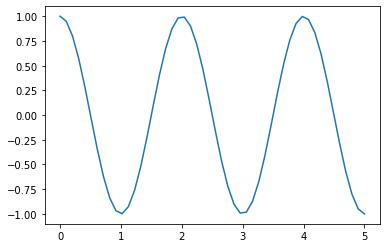

In [31]:
plt.plot(x,y)

In [25]:
plotmon.curves[0]['config']['y']

array([ 1.        ,  0.94905575,  0.80141362,  0.57211666,  0.28452759,
       -0.03205158, -0.34536505, -0.6234898 , -0.8380881 , -0.96729486,
       -0.99794539, -0.92691676, -0.76144596, -0.51839257, -0.22252093,
        0.09602303,  0.40478334,  0.67230089,  0.8713187 ,  0.98155916,
        0.99179001,  0.90096887,  0.71834935,  0.46253829,  0.1595999 ,
       -0.1595999 , -0.46253829, -0.71834935, -0.90096887, -0.99179001,
       -0.98155916, -0.8713187 , -0.67230089, -0.40478334, -0.09602303,
        0.22252093,  0.51839257,  0.76144596,  0.92691676,  0.99794539,
        0.96729486,  0.8380881 ,  0.6234898 ,  0.34536505,  0.03205158,
       -0.28452759, -0.57211666, -0.80141362, -0.94905575, -1.        ])

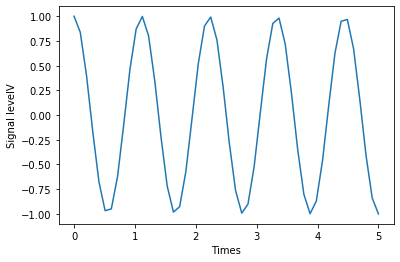

In [12]:
f,ax = plt.subplots()

ax.set_xlabel(dset['x0'].attrs['long_name']+ dset['x0'].attrs['unit'])
ax.set_ylabel(dset['y0'].attrs['long_name']+ dset['y0'].attrs['unit'])

ax.plot(dset['x0'], dset['y0'])

In [13]:
dset.attrs['tuid']

'20200430-185023-32e071'

## Below is for testing

In [15]:
tuid =dset.attrs['tuid']
plotmon.tuid(tuid)
plotmon.tuid(tuid)

In [19]:
plotmon.tuid()

'20200430-185023-32e071'

In [23]:
from quantify.measurement import data_handling as dh
import os

In [59]:
dd = valid_ddirs[1]
expdirs =os.listdir(os.path.join(datadir, dd))

In [94]:
list(filter(lambda x: (x.isdigit() and len(x)==8), os.listdir(datadir)))

expdirs[2][:6]
expdirs[2][6] =='-'
expdirs[2][13] == '-'
contains = 'Cos'

expdirs = list(filter(lambda x: (x[:6].isdigit() and x[6]=='-' and len(x)>12 and contains in x), os.listdir(os.path.join(datadir, dd))))
expdirs.sort(reverse=True)
expdirs

['185023-32e071-Cosine test',
 '184429-496da5-Cosine test',
 '184217-812e58-Cosine test',
 '184110-d82c68-Cosine test',
 '184054-fa124c-Cosine test',
 '170348-951782-Cosine test']

In [53]:
os.listdir(os.path.join(datadir, valid_ddirs[0]))

['101943-b482c4-Cosine test']

In [80]:
ddirs = os.listdir(dh.get_datadir())
datadir = dh.get_datadir()


valid_ddirs = list(filter(lambda x: (x.isdigit() and len(x)==8), os.listdir(datadir)))
valid_ddirs.sort(reverse=True)

In [81]:
valid_ddirs

['20200501', '20200430', '20200429']

In [45]:
valid_ddirs.sort(reverse=True)
valid_ddirs

AttributeError: 'NoneType' object has no attribute 'sort'

In [34]:
os.listdir(ddirs)


TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not list

In [30]:
ddirs[1].isdigit() and len(ddirs[1]) == 8
# ddirs[0].isdigit()


True

In [17]:
plotmon.update_plotmon()

In [32]:
from qcodes.plots.pyqtgraph import QtPlot, TransformState
from qcodes.plots.colors import color_cycle

In [34]:
plot_mon = QtPlot(window_title='Test 
                  ', figsize=(600,400))

In [35]:
plot_mon.clear()

In [36]:
dset

<xarray.Dataset>
Dimensions:  (dim_0: 50)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 0.0 0.102 0.2041 0.3061 ... 4.694 4.796 4.898 5.0
    y0       (dim_0) float64 1.0 0.9491 0.8014 0.5721 ... -0.8014 -0.9491 -1.0
Attributes:
    tuid:     20200430-173337-2141d4

In [80]:
p = plot_mon.add(x=dset['x0'].values, y=dset['y0'].values, subplot=1, 
            xlabel=dset['x0'].attrs['long_name'], xunit=dset['x0'].attrs['unit'], 
            ylabel=dset['y0'].attrs['long_name'], yunit=dset['y0'].attrs['unit'], 
            symbol='o', symbolSize=5,
            )

In [88]:
plot_mon.traces[0]['config']['y']=y

In [89]:
plot_mon.update_plot()

In [97]:
list(filter(lambda k: 'x' in k, dset.keys()))

['x0']

In [94]:
if 'x0' in dset.keys()

SyntaxError: invalid syntax (<ipython-input-94-fa82cfee2bc8>, line 1)

In [92]:
len(dset.keys())

2

In [ ]:
plot_mon.add()

In [23]:
from quantify.measurement.measurement_control import gen_tuid

In [24]:
def _initialize_dataset(self):
    """
    Initialize an empty dataset based on
        mode, setables, getable_pars and _setable_pars

    """
    darrs = []
    for i, setpar in enumerate(self._setable_pars):
        darrs.append(xr.DataArray(
            data=self._setpoints[:, i],
            name='x{}'.format(i),
            attrs={'name': setpar.name, 'long_name': setpar.label,
                   'unit': setpar.unit}))

    numpoints = len(self._setpoints[:, 0])
    for j, getpar in enumerate(self._getable_pars):
        empty_arr = np.empty(numpoints)
        empty_arr[:] = np.nan
        darrs.append(xr.DataArray(
            data=empty_arr,
            name='y{}'.format(i),
            attrs={'name': getpar.name, 'long_name': getpar.label,
                   'unit': getpar.unit}))

    self._dataset = xr.merge(darrs)
    self._dataset.attrs['tuid'] = gen_tuid()

In [26]:
_initialize_dataset(MC)

MC._dataset

<xarray.Dataset>
Dimensions:  (dim_0: 20)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 5e+09 5.01e+09 5.02e+09 ... 5.18e+09 5.19e+09
    y0       (dim_0) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    tuid:     20200429-165120-d80501

In [15]:
MC._setable_pars

[<qcodes.instrument.parameter.ManualParameter: freq at 4691160784>]

In [17]:
np.shape(MC._setpoints)

(20, 1)

In [20]:
MC._getable_pars[0].name

'sig'

In [12]:
MC.__str__??

Signature:      MC.__str__()
Call signature: MC.__str__(*args, **kwargs)
Type:           method-wrapper
String form:    <method-wrapper '__str__' of MeasurementControl object at 0x1179bb850>
Docstring:      Return str(self).


In [14]:
MC.__repr__??

Signature: MC.__repr__() -> str
Source:   
    def __repr__(self) -> str:
        """Simplified repr giving just the class and name."""
        return '<{}: {}>'.format(type(self).__name__, self.name)
File:      /usr/local/lib/python3.7/site-packages/qcodes/instrument/base.py
Type:      method


In [19]:
isinstance([freq,], (list, tuple))

True

In [22]:
del freq.unit


In [23]:
freq

<qcodes.instrument.parameter.ManualParameter: freq at 4715851664>

In [24]:
freq.unit

AttributeError: 'ManualParameter' object has no attribute 'unit'

In [7]:
from qcodes.instrument.parameter import MultiParameter
MultiParameter

qcodes.instrument.parameter.MultiParameter

In [13]:
dset = MC._dataset
dset 

<xarray.Dataset>
Dimensions:  (dim_0: 101)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 0.0 0.1 0.2 0.3 0.4 0.5 ... 9.6 9.7 9.8 9.9 10.0
    y0       (dim_0) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan
Attributes:
    tuid:     20200425-120536-643e1a

In [23]:
dset['y0']

<xarray.DataArray 'y0' (dim_0: 101)>
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Dimensions without coordinates: dim_0
Attributes:
    name:       sig
    long_name:  Signal level
    unit:       V

In [33]:
dset['x0'].attrs

{'name': 't', 'long_name': 'Time', 'unit': 's'}

In [34]:
dset['y0'].attrs

{'name': 'sig', 'long_name': 'Signal level', 'unit': 'V'}

In [35]:
dset.attrs

{}

In [30]:
dset.keys() == {'x0'}

False

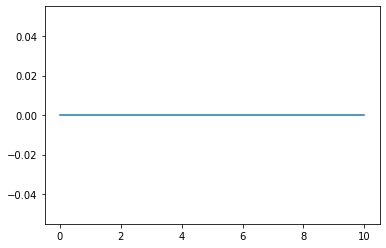

In [24]:
plt.plot(dset['x0'], dset['y0'])

In [8]:
np.shape(

SyntaxError: unexpected EOF while parsing (<ipython-input-8-3cf8d4e71000>, line 1)

In [9]:
len(np.shape(MC._setpoints))

1

# MC._setpoints[:, ]

In [10]:
len(np.shape())

TypeError: _shape_dispatcher() missing 1 required positional argument: 'a'

In [11]:
xP0 = t
yP0 = sig

In [12]:
x0pts = np.linspace(0, 10, 100)
x0R = xr.DataArray(data=x0pts, name=xP0.name, attrs={'long_name':xP0.label, 'unit':xP0.unit})


empty_arr = np.empty(np.shape(x0pts))
empty_arr[:] = np.nan
y0R = xr.DataArray(empty_arr, name=yP0.name, attrs={'long_name':yP0.label, 'unit': yP0.unit})

In [13]:
ds['t']

NameError: name 'ds' is not defined

In [14]:
ds = xr.merge([x0R, y0R])

In [58]:
ds['t'].values

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [59]:

ds['sig'].values[2] =3.4

In [60]:
ds['sig'].values

array([1. , nan, 3.4, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [61]:
print(ds)

<xarray.Dataset>
Dimensions:  (dim_0: 100)
Dimensions without coordinates: dim_0
Data variables:
    t        (dim_0) float64 0.0 0.101 0.202 0.303 ... 9.697 9.798 9.899 10.0
    sig      (dim_0) float64 1.0 nan 3.4 nan nan nan ... nan nan nan nan nan nan


In [66]:
ds = xr.merge([x0R, y0R])

In [67]:
ds.items()

ItemsView(<xarray.Dataset>
Dimensions:  (dim_0: 100)
Dimensions without coordinates: dim_0
Data variables:
    t        (dim_0) float64 0.0 0.101 0.202 0.303 ... 9.697 9.798 9.899 10.0
    sig      (dim_0) float64 1.0 nan 3.4 nan nan nan ... nan nan nan nan nan nan)

In [90]:
for i, x in enumerate(x0R.values):
#     print(x)
    xP0(x)
#     print(yP0())
    y0R.values[i] = yP0()
    

In [77]:
y0R.values

array([ 1.        ,  0.80527026,  0.29692038, -0.32706796, -0.82367658,
       -0.99949654, -0.78605309, -0.26647381,  0.35688622,  0.84125353,
        0.99798668,  0.76604444,  0.23575894, -0.38634513, -0.85798341,
       -0.99547192, -0.74526445, -0.20480667,  0.41541501,  0.87384938,
        0.99195481,  0.72373404,  0.17364818, -0.44406661, -0.88883545,
       -0.98743889, -0.70147489, -0.14231484,  0.47227107,  0.90292654,
        0.9819287 ,  0.67850941,  0.1108382 , -0.5       , -0.91610846,
       -0.97542979, -0.65486073, -0.07924996,  0.52722547,  0.92836793,
        0.9679487 ,  0.63055267,  0.04758192, -0.55392006, -0.93969262,
       -0.95949297, -0.60560969, -0.01586596,  0.58005691,  0.95007112,
        0.95007112,  0.58005691, -0.01586596, -0.60560969, -0.95949297,
       -0.93969262, -0.55392006,  0.04758192,  0.63055267,  0.9679487 ,
        0.92836793,  0.52722547, -0.07924996, -0.65486073, -0.97542979,
       -0.91610846, -0.5       ,  0.1108382 ,  0.67850941,  0.98

In [31]:
MC._setpoints = 

In [32]:
MC._setpoints

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [ ]:
xr.Dataset({}, )

In [24]:
import pandas as pd
temp = 15 + 8 * np.random.randn(2, 2, 3)

precip = 10 * np.random.rand(2, 2, 3)

lon = [[-99.83, -99.32], [-99.79, -99.23]]

lat = [[42.25, 42.21], [42.63, 42.59]]

test_ds = xr.Dataset({'temperature': (['x', 'y', 'time'],  temp),
                  'precipitation': (['x', 'y', 'time'], precip)},
                 coords={'lon': (['x', 'y'], lon),
                         'lat': (['x', 'y'], lat),
                         'time': pd.date_range('2014-09-06', periods=3),
                         'reference_time': pd.Timestamp('2014-09-05')})

In [26]:
xr.Dataset?

Init signature: xr.Dataset(*args, **kwds)
Docstring:     
A multi-dimensional, in memory, array database.

A dataset resembles an in-memory representation of a NetCDF file, and
consists of variables, coordinates and attributes which together form a
self describing dataset.

Dataset implements the mapping interface with keys given by variable names
and values given by DataArray objects for each variable name.

One dimensional variables with name equal to their dimension are index
coordinates used for label based indexing.
Init docstring:
To load data from a file or file-like object, use the `open_dataset`
function.

Parameters
----------
data_vars : dict-like, optional
    A mapping from variable names to :py:class:`~xarray.DataArray`
    objects, :py:class:`~xarray.Variable` objects or to tuples of the
    form ``(dims, data[, attrs])`` which can be used as arguments to
    create a new ``Variable``. Each dimension must have the same length
    in all variables in which it appears.

  

In [25]:
test_ds

<xarray.Dataset>
Dimensions:         (time: 3, x: 2, y: 2)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 22.12 19.78 15.54 ... 2.444 8.32 4.651
    precipitation   (x, y, time) float64 2.002 7.45 0.4474 ... 8.386 1.118 6.188

In [4]:
MC.setable_pars()

[]

In [5]:
p0 = ManualParameter('p0')

In [8]:
MC.setable_pars([p0])

In [9]:
MC.setable_pars()

[<qcodes.instrument.parameter.ManualParameter: p0 at 4807988304>]

In [10]:
MC.setable_pars(p0, p0)

TypeError: set_wrapper() takes 1 positional argument but 2 were given

In [10]:
p0.unit

''

In [11]:
def cos_po():
    return np.cos(p0())

In [13]:
p1 = Parameter('p1', get_cmd=cos_po)

In [15]:
MC.setables(p0)

In [16]:
MC.getables(p1)

In [17]:
MC.run()

In [19]:
x0 = np.linspace(0, 30)

In [20]:
y0 = []
for x in x0: 
    p0(x)
    y0.append(p1())

In [31]:
from quantify.measurement.data_handling import gen_tuid

In [68]:
snap = MC.snapshot()
exclude_keys = {
    "inter_delay",
    "post_delay",
    "vals",
    "instrument",
    "functions",
    "__class__",
    "ts",
    "raw_value",
    "instrument_name",
    "full_name",
    "val_mapping",
    "setables",
    "getables",
}
cleaned_snapshot = delete_keys_from_dict(snap, exclude_keys)

In [69]:
cleaned_snapshot

{'submodules': {},
 'parameters': {'IDN': {'value': None,
   'label': 'IDN',
   'unit': '',
   'name': 'IDN'},
  'datadir': {'value': '', 'label': 'datadir', 'unit': '', 'name': 'datadir'}},
 'name': 'MC'}

In [70]:
x0r = xr.DataArray(x0, name=p0.name, attrs={'label':p0.label, 'unit':p0.unit})
y0r = xr.DataArray(y0, name=p1.name, attrs={'label':p1.label, 'unit':p1.unit})

dset = xr.Dataset({'x0': x0r, 'y0':y0r}, attrs={'tuid': gen_tuid(), 'snapshot': cleaned_snapshot})

In [71]:
dset.to_netcdf('test.hdf5')

TypeError: Invalid value for attr: {'submodules': {}, 'parameters': {'IDN': {'value': None, 'label': 'IDN', 'unit': '', 'name': 'IDN'}, 'datadir': {'value': '', 'label': 'datadir', 'unit': '', 'name': 'datadir'}}, 'name': 'MC'} must be a number, a string, an ndarray or a list/tuple of numbers/strings for serialization to netCDF files

In [45]:
new_dset = xr.open_dataset('test.hdf5')

In [46]:
new_dset

<xarray.Dataset>
Dimensions:  (dim_0: 50)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 ...
    y0       (dim_0) float64 ...
Attributes:
    tuid:     20200424-232315-8e90a7

In [52]:
cos_po.unit = 'a'

In [56]:
cos_po.get = cos_po.__call__

In [54]:
cos_po.name = 'cos'

In [55]:
cos_po.label='cos'

In [57]:
MC.getables(cos_po)

In [59]:
from quantify.measurement.measurement_control import is_getable, is_setable

In [60]:
from quantify.utilities.general import delete_keys_from_dict

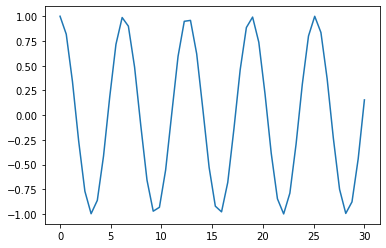

In [49]:
plt.plot(new_dset['x0'], new_dset['y0'])

In [36]:
MC.snapshot()

{'functions': {},
 'submodules': {},
 '__class__': 'quantify.measurement.measurement_control.MeasurementControl',
 'parameters': {'IDN': {'value': None,
   'ts': None,
   'raw_value': None,
   '__class__': 'qcodes.instrument.parameter.Parameter',
   'full_name': 'MC_IDN',
   'label': 'IDN',
   'unit': '',
   'inter_delay': 0,
   'instrument': 'quantify.measurement.measurement_control.MeasurementControl',
   'instrument_name': 'MC',
   'post_delay': 0,
   'name': 'IDN',
   'vals': '<Anything>'},
  'datadir': {'value': '',
   'ts': '2020-04-24 23:07:16',
   'raw_value': '',
   '__class__': 'qcodes.instrument.parameter.ManualParameter',
   'full_name': 'MC_datadir',
   'label': 'datadir',
   'unit': '',
   'inter_delay': 0,
   'instrument': 'quantify.measurement.measurement_control.MeasurementControl',
   'instrument_name': 'MC',
   'post_delay': 0,
   'name': 'datadir',
   'vals': '<Strings>'},
  'setables': {'value': <qcodes.instrument.parameter.ManualParameter: p0 at 4848886864>,
   't

In [37]:
dset

<xarray.Dataset>
Dimensions:  (dim_0: 50)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 0.0 0.6122 1.224 1.837 ... 28.16 28.78 29.39 30.0
    y0       (dim_0) float64 1.0 0.8184 0.3394 -0.2628 ... -0.877 -0.4416 0.1543
Attributes:
    tuid:      20200424-231655-157fb8
    snapshot:  {'functions': {}, 'submodules': {}, '__class__': 'quantify.mea...

In [39]:
dset.attrs['snapshot']

{'functions': {},
 'submodules': {},
 '__class__': 'quantify.measurement.measurement_control.MeasurementControl',
 'parameters': {'IDN': {'value': None,
   'ts': None,
   'raw_value': None,
   '__class__': 'qcodes.instrument.parameter.Parameter',
   'full_name': 'MC_IDN',
   'label': 'IDN',
   'unit': '',
   'inter_delay': 0,
   'instrument': 'quantify.measurement.measurement_control.MeasurementControl',
   'instrument_name': 'MC',
   'post_delay': 0,
   'name': 'IDN',
   'vals': '<Anything>'},
  'datadir': {'value': '',
   'ts': '2020-04-24 23:07:16',
   'raw_value': '',
   '__class__': 'qcodes.instrument.parameter.ManualParameter',
   'full_name': 'MC_datadir',
   'label': 'datadir',
   'unit': '',
   'inter_delay': 0,
   'instrument': 'quantify.measurement.measurement_control.MeasurementControl',
   'instrument_name': 'MC',
   'post_delay': 0,
   'name': 'datadir',
   'vals': '<Strings>'},
  'setables': {'value': <qcodes.instrument.parameter.ManualParameter: p0 at 4848886864>,
   't

In [29]:
dset.items

<bound method Mapping.items of <xarray.Dataset>
Dimensions:  (dim_0: 50)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 0.0 0.6122 1.224 1.837 ... 28.16 28.78 29.39 30.0
    y0       (dim_0) float64 1.0 0.8184 0.3394 -0.2628 ... -0.877 -0.4416 0.1543>

In [27]:
dset

<xarray.Dataset>
Dimensions:  (dim_0: 50)
Dimensions without coordinates: dim_0
Data variables:
    x0       (dim_0) float64 0.0 0.6122 1.224 1.837 ... 28.16 28.78 29.39 30.0
    y0       (dim_0) float64 1.0 0.8184 0.3394 -0.2628 ... -0.877 -0.4416 0.1543

In [ ]:
hasattr()